In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
x = np.concatenate([x_train,x_test], axis=0)
y = np.concatenate([y_train,y_test], axis=0)

In [6]:
x = x.astype('float32')/255.0

In [7]:
y[1]

array([9], dtype=uint8)

In [8]:
x_trainval , x_test , y_trainval , y_test = train_test_split(
    x , y , test_size=0.15 , shuffle=True , random_state=42
)

In [9]:
x_test.shape

(9000, 32, 32, 3)

In [10]:
x_train , x_val , y_train , y_val = train_test_split(
    x_trainval , y_trainval , test_size=0.15 , random_state=42 , shuffle=True
)

In [11]:
x_train.shape

(43350, 32, 32, 3)

### Simple convolutional network (With Pooling)

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32 , 5 , activation='relu' , padding="same" , input_shape=[32,32,3]))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(32, 3 , activation='relu' , padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(68 , 3 , activation='relu' , padding='same'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(68 , 3 , activation='relu' , padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128 , activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10 , activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 68)     │        19,652 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 68)     │           272 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 68)     │        41,684 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 68)     │           272 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 68)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       557,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 639,906 (2.44 MB)

 Trainable params: 639,506 (2.44 MB)

 Non-trainable params: 400 (1.56 KB)

In [29]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [15]:
# Callbacks:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=0.001
)

model_ckpt = keras.callbacks.ModelCheckpoint(
    filepath='best_model_cifar10.keras',
    monitor='val_accuracy',
    save_best_only=True
)

In [30]:
import time
start_time = time.time()

history_with_Pooling = model.fit(
    x_train , y_train ,
    epochs=50 ,
    validation_data = (x_val , y_val),
    callbacks = [model_ckpt , reduce_lr , early_stop]
)

end_time = time.time()

Epoch 1/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 93s 66ms/step - accuracy: 0.3337 - loss: 1.8618 - val_accuracy: 0.5810 - val_loss: 1.1910 - learning_rate: 0.0010
Epoch 2/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 98s 72ms/step - accuracy: 0.5543 - loss: 1.2404 - val_accuracy: 0.6320 - val_loss: 1.0379 - learning_rate: 0.0010
Epoch 3/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 103s 76ms/step - accuracy: 0.6297 - loss: 1.0390 - val_accuracy: 0.6208 - val_loss: 1.1079 - learning_rate: 0.0010
Epoch 4/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 90s 66ms/step - accuracy: 0.6878 - loss: 0.8976 - val_accuracy: 0.6885 - val_loss: 0.9343 - learning_rate: 0.0010
Epoch 5/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 114s 84ms/step - accuracy: 0.7293 - loss: 0.7753 - val_accuracy: 0.7290 - val_loss: 0.7993 - learning_rate: 0.0010
Epoch 6/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 90s 66ms/step - accuracy: 0.7617 - loss: 0.6847 - val_accuracy: 0.7642 - val_loss: 0.7156 - learning_rate: 0.0010
Epoch 7/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 90s 66ms/step - accu

In [31]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Training With Pooling : ")
print(f"Final Test Accuracy: {acc:.4f}")
print(f"Final Test Loss: {loss:.4f}")
print(f"Total Training Time : {end_time - start_time} seconds (WithPooling)")

Training With Pooling : 
Final Test Accuracy: 0.7646
Final Test Loss: 0.7147
Total Training Time : 1585.0526564121246 seconds (WithPooling)


### Without Pooling

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32 , 5 , activation='relu' , padding="same" , input_shape=[32,32,3]))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(32, 3 , activation='relu' , padding='same'))
model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(68 , 3 , activation='relu' , padding='same'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(68 , 3 , activation='relu' , padding='same'))
model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128 , activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10 , activation='softmax'))

d:\Programming\Deep_Learning\tf-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 68)     │        19,652 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 32, 32, 68)     │           272 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 68)     │        41,684 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 32, 32, 68)     │           272 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 69632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     8,913,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,988,130 (34.29 MB)

 Trainable params: 8,987,730 (34.29 MB)

 Non-trainable params: 400 (1.56 KB)

In [34]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [35]:
import time
start_time = time.time()

history_without_Pooling = model.fit(
    x_train , y_train ,
    epochs=50 ,
    validation_data = (x_val , y_val),
    callbacks = [reduce_lr , early_stop]
)

end_time = time.time()

Epoch 1/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 260s 189ms/step - accuracy: 0.1096 - loss: 2.5661 - val_accuracy: 0.1007 - val_loss: 2.3028 - learning_rate: 0.0010
Epoch 2/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 242s 179ms/step - accuracy: 0.0985 - loss: 2.3029 - val_accuracy: 0.1174 - val_loss: 68.9659 - learning_rate: 0.0010
Epoch 3/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 240s 177ms/step - accuracy: 0.1000 - loss: 2.3045 - val_accuracy: 0.1009 - val_loss: 2.3028 - learning_rate: 0.0010
Epoch 4/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 268s 198ms/step - accuracy: 0.1000 - loss: 2.3025 - val_accuracy: 0.0942 - val_loss: 2.3026 - learning_rate: 0.0010
Epoch 5/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 243s 180ms/step - accuracy: 0.0977 - loss: 2.3028 - val_accuracy: 0.0942 - val_loss: 2.3028 - learning_rate: 0.0010
Epoch 6/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 239s 176ms/step - accuracy: 0.1014 - loss: 2.3026 - val_accuracy: 0.1020 - val_loss: 2.3027 - learning_rate: 0.0010
Epoch 7/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 238s 176m

In [36]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Training Without Pooling : ")
print(f"Final Test Accuracy: {acc:.4f}")
print(f"Final Test Loss: {loss:.4f}")
print(f"Total Training Time : {end_time - start_time} seconds (Without Pooling)")

Training Without Pooling : 
Final Test Accuracy: 0.0953
Final Test Loss: 2.3029
Total Training Time : 6256.5792071819305 seconds (Without Pooling)


### Pooling with Stride 4 and 2

In [40]:
# stride = 2
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32 , 5 , activation='relu' , padding="same" , input_shape=[32,32,3]))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(32, 3 , activation='relu' , padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size =(2, 2) , strides = 2))

model.add(keras.layers.Conv2D(68 , 3 , activation='relu' , padding='same'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(68 , 3 , activation='relu' , padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2) , strides = 2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128 , activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10 , activation='softmax'))

d:\Programming\Deep_Learning\tf-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 16, 16, 68)     │        19,652 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 16, 16, 68)     │           272 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 16, 16, 68)     │        41,684 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 16, 16, 68)     │           272 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 8, 8, 68)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       557,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 632,290 (2.41 MB)

 Trainable params: 631,890 (2.41 MB)

 Non-trainable params: 400 (1.56 KB)

In [42]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [43]:
history_with_stride_2 = model.fit(
    x_train , y_train ,
    epochs=50 ,
    validation_data = (x_val , y_val),
    callbacks = [reduce_lr , early_stop]
)

Epoch 1/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 98s 70ms/step - accuracy: 0.3372 - loss: 1.9128 - val_accuracy: 0.5471 - val_loss: 1.2727 - learning_rate: 0.0010
Epoch 2/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.5569 - loss: 1.2465 - val_accuracy: 0.6725 - val_loss: 0.9450 - learning_rate: 0.0010
Epoch 3/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 74s 55ms/step - accuracy: 0.6378 - loss: 1.0353 - val_accuracy: 0.6527 - val_loss: 1.0171 - learning_rate: 0.0010
Epoch 4/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 76s 56ms/step - accuracy: 0.6904 - loss: 0.8950 - val_accuracy: 0.7218 - val_loss: 0.8150 - learning_rate: 0.0010
Epoch 5/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.7363 - loss: 0.7733 - val_accuracy: 0.7140 - val_loss: 0.8274 - learning_rate: 0.0010
Epoch 6/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 71s 52ms/step - accuracy: 0.7628 - loss: 0.6816 - val_accuracy: 0.7523 - val_loss: 0.7295 - learning_rate: 0.0010
Epoch 7/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 78s 58ms/step - accura

In [44]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Training With Stride=2 : ")
print(f"Final Test Accuracy: {acc:.4f}")
print(f"Final Test Loss: {loss:.4f}")
print(f"Total Training Time : {end_time - start_time} seconds (With stride = 2)")

Training With Stride=2 : 
Final Test Accuracy: 0.7831
Final Test Loss: 0.7314
Total Training Time : 6256.5792071819305 seconds (With stride = 2)


In [47]:
# stride = 4
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32 , 5 , activation='relu' , padding="same" , input_shape=[32,32,3]))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(32, 3 , activation='relu' , padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size = (2,2) , strides = 4))

model.add(keras.layers.Conv2D(68 , 3 , activation='relu' , padding='same'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(68 , 3 , activation='relu' , padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size = (2,2) , strides = 4))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128 , activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10 , activation='softmax'))

In [48]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [49]:
history_with_stride_4 = model.fit(
    x_train , y_train ,
    epochs=50 ,
    validation_data = (x_val , y_val),
    callbacks = [reduce_lr , early_stop]
)

Epoch 1/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 58s 40ms/step - accuracy: 0.3534 - loss: 1.8156 - val_accuracy: 0.4860 - val_loss: 1.4203 - learning_rate: 0.0010
Epoch 2/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 50s 37ms/step - accuracy: 0.5615 - loss: 1.2148 - val_accuracy: 0.6033 - val_loss: 1.1468 - learning_rate: 0.0010
Epoch 3/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 49s 36ms/step - accuracy: 0.6463 - loss: 1.0020 - val_accuracy: 0.6549 - val_loss: 0.9783 - learning_rate: 0.0010
Epoch 4/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 51s 38ms/step - accuracy: 0.6948 - loss: 0.8603 - val_accuracy: 0.6336 - val_loss: 1.0558 - learning_rate: 0.0010
Epoch 5/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 48s 35ms/step - accuracy: 0.7234 - loss: 0.7847 - val_accuracy: 0.6945 - val_loss: 0.8960 - learning_rate: 0.0010
Epoch 6/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 54s 40ms/step - accuracy: 0.7560 - loss: 0.6970 - val_accuracy: 0.7233 - val_loss: 0.7871 - learning_rate: 0.0010
Epoch 7/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 52s 38ms/step - accura

In [50]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Training With Stride=4 : ")
print(f"Final Test Accuracy: {acc:.4f}")
print(f"Final Test Loss: {loss:.4f}")
print(f"Total Training Time : {end_time - start_time} seconds (With stride = 4)")

Training With Stride=4 : 
Final Test Accuracy: 0.7090
Final Test Loss: 0.8392
Total Training Time : 6256.5792071819305 seconds (With stride = 4)


### Exponential and OneCycle (Learning Rate)

In [51]:
# Exponential Decay
from keras.optimizers.schedules import ExponentialDecay

exp_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True
    )

In [52]:
def create_model() :
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32 , 5 , activation='relu' , padding="same" , input_shape=[32,32,3]))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(32, 3 , activation='relu' , padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(2))

    model.add(keras.layers.Conv2D(68 , 3 , activation='relu' , padding='same'))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(68 , 3 , activation='relu' , padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(2))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128 , activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(10 , activation='softmax'))
    
    return model

In [53]:
# Callbacks:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

In [54]:
model_exp = create_model()
model_exp.compile(optimizer=keras.optimizers.Adam(learning_rate=exp_schedule),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [55]:
history_exp = model_exp.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks = [early_stop]
    )

Epoch 1/50
678/678 ━━━━━━━━━━━━━━━━━━━━ 97s 135ms/step - accuracy: 0.3567 - loss: 1.8703 - val_accuracy: 0.5342 - val_loss: 1.2943
Epoch 2/50
678/678 ━━━━━━━━━━━━━━━━━━━━ 91s 134ms/step - accuracy: 0.5636 - loss: 1.2259 - val_accuracy: 0.6566 - val_loss: 0.9629
Epoch 3/50
678/678 ━━━━━━━━━━━━━━━━━━━━ 119s 175ms/step - accuracy: 0.6404 - loss: 1.0177 - val_accuracy: 0.6881 - val_loss: 0.9095
Epoch 4/50
678/678 ━━━━━━━━━━━━━━━━━━━━ 83s 122ms/step - accuracy: 0.6962 - loss: 0.8612 - val_accuracy: 0.6766 - val_loss: 0.9244
Epoch 5/50
678/678 ━━━━━━━━━━━━━━━━━━━━ 70s 103ms/step - accuracy: 0.7347 - loss: 0.7548 - val_accuracy: 0.7101 - val_loss: 0.8457
Epoch 6/50
678/678 ━━━━━━━━━━━━━━━━━━━━ 67s 98ms/step - accuracy: 0.7626 - loss: 0.6724 - val_accuracy: 0.7638 - val_loss: 0.6821
Epoch 7/50
678/678 ━━━━━━━━━━━━━━━━━━━━ 68s 100ms/step - accuracy: 0.8015 - loss: 0.5642 - val_accuracy: 0.7661 - val_loss: 0.6898
Epoch 8/50
678/678 ━━━━━━━━━━━━━━━━━━━━ 71s 105ms/step - accuracy: 0.8266 - loss: 0

In [71]:
class One_cycle_lr(keras.callbacks.Callback):
    def __init__(self, iterations, max_lr, init_lr=None,final_steps=None, final_lr=None):
        super().__init__()
        self.iterations = iterations              
        self.max_lr = max_lr                    
        self.init_lr = init_lr or max_lr / 10   
        self.final_steps = final_steps or int(iterations/10)+1
        self.half_iterations = int((iterations - self.final_steps)/2)
        self.final_lr = final_lr or self.init_lr/1000
        self.iteration = 0
        self.history = []                        
    
    def interpolation(self, y2, y1, x2, x1):
        return (y2 - y1)/(x2 - x1)*(self.iteration - x1) + y1
    
    def on_batch_begin(self, batch, logs=None):
        if self.iteration < self.half_iterations:  
            lr = self.interpolation(self.max_lr, self.init_lr,
                                    self.half_iterations, 0)
        elif self.iteration < 2*self.half_iterations: 
            lr = self.interpolation(self.init_lr, self.max_lr,
                                    2*self.half_iterations, self.half_iterations)
        else:
            lr = self.interpolation(self.final_lr, self.init_lr,
                                    self.iterations, 2*self.half_iterations)
        
        self.iteration += 1
        self.model.optimizer.learning_rate.assign(lr)
        self.history.append(lr)

In [72]:
model_onecycle = create_model()
model_onecycle.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [73]:
batch_size = 64
epochs = 50
steps_per_epoch = len(x_train) // batch_size
iterations = steps_per_epoch * epochs

one_cycle = One_cycle_lr(iterations=iterations, max_lr=0.01)

In [74]:
history_onecycle = model_onecycle.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[one_cycle , early_stop]
    )

Epoch 1/50
678/678 ━━━━━━━━━━━━━━━━━━━━ 71s 99ms/step - accuracy: 0.3434 - loss: 1.8802 - val_accuracy: 0.4105 - val_loss: 1.8940
Epoch 2/50
678/678 ━━━━━━━━━━━━━━━━━━━━ 66s 98ms/step - accuracy: 0.5435 - loss: 1.2776 - val_accuracy: 0.5464 - val_loss: 1.3260
Epoch 3/50
678/678 ━━━━━━━━━━━━━━━━━━━━ 71s 105ms/step - accuracy: 0.6194 - loss: 1.0875 - val_accuracy: 0.4778 - val_loss: 1.7228
Epoch 4/50
678/678 ━━━━━━━━━━━━━━━━━━━━ 102s 150ms/step - accuracy: 0.6714 - loss: 0.9533 - val_accuracy: 0.6834 - val_loss: 0.9365
Epoch 5/50
678/678 ━━━━━━━━━━━━━━━━━━━━ 103s 151ms/step - accuracy: 0.7108 - loss: 0.8381 - val_accuracy: 0.6630 - val_loss: 1.0223
Epoch 6/50
678/678 ━━━━━━━━━━━━━━━━━━━━ 72s 106ms/step - accuracy: 0.7407 - loss: 0.7621 - val_accuracy: 0.7220 - val_loss: 0.8248
Epoch 7/50
678/678 ━━━━━━━━━━━━━━━━━━━━ 68s 101ms/step - accuracy: 0.7654 - loss: 0.6806 - val_accuracy: 0.6545 - val_loss: 1.2285
Epoch 8/50
678/678 ━━━━━━━━━━━━━━━━━━━━ 71s 105ms/step - accuracy: 0.7810 - loss: 0

### Comparing Exponential and OneCycle

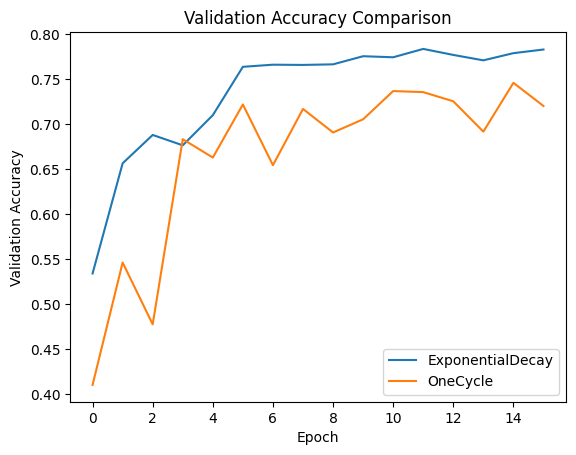

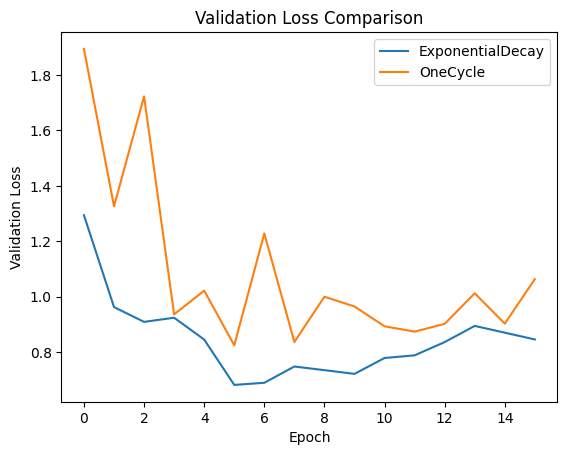

In [75]:
# Accuracy
plt.plot(history_exp.history['val_accuracy'], label='ExponentialDecay')
plt.plot(history_onecycle.history['val_accuracy'], label='OneCycle')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title("Validation Accuracy Comparison")
plt.show()

# Loss
plt.plot(history_exp.history['val_loss'], label='ExponentialDecay')
plt.plot(history_onecycle.history['val_loss'], label='OneCycle')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.title("Validation Loss Comparison")
plt.show()